### E-retail factors for customer activation and retention: A case study from Indian e-commerce customers
Customer satisfaction has emerged as one of the most important factors that guarantee the success of online store; it has been posited as a key stimulant of purchase, repurchase intentions and customer loyalty. A comprehensive review of the literature, theories and models have been carried out to propose the models for customer activation and customer retention. Five major factors that contributed to the success of an e-commerce store have been identified as:<b> service quality, system quality, information quality, trust and net benefit</b>. The research furthermore investigated the factors that influence the online customers repeat purchase intention. The combination of both utilitarian value and hedonistic values are needed to affect the repeat purchase intention (loyalty) positively. The data is collected from the Indian online shoppers. Results indicate the e-retail success factors, which are very much critical for customer satisfaction.

#### Be careful: There are two sheets (one is detailed) and second is encoded in the excel file. You may use any of them by extracting in separate excel sheet. The number of column(s) is more than 47. Read the column header carefully.
Note : Data Scientists have to apply their analytical skills to give findings and conclusions in detailed data analysis written in jupyter notebook . Only data analysis is required.                         
Need not to create machine learning models /but still if anybody comes with it that is welcome.


In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')
import scipy
from sklearn.decomposition import PCA

In [3]:
#import the given dataset
df=pd.read_excel('customer_retention_dataset.xlsx') 
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


### Data Inspection

In [4]:
df.dtypes

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [5]:
df.shape

(269, 71)

The data set contains: 269 rows and 71 columns


In [6]:
df.describe()

,4 What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [8]:
df.nunique()

1Gender of respondent                                                    2
2 How old are you?                                                       5
3 Which city do you shop online from?                                   11
4 What is the Pin Code of where you shop online from?                   39
5 Since How Long You are Shopping Online ?                               5
                                                                        ..
Longer delivery period                                                   6
Change in website/Application design                                     7
Frequent disruption when moving from one page to another                 8
Website is as efficient as before                                        8
Which of the Indian online retailer would you recommend to a friend?     8
Length: 71, dtype: int64

In [9]:
# Checking for null values
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

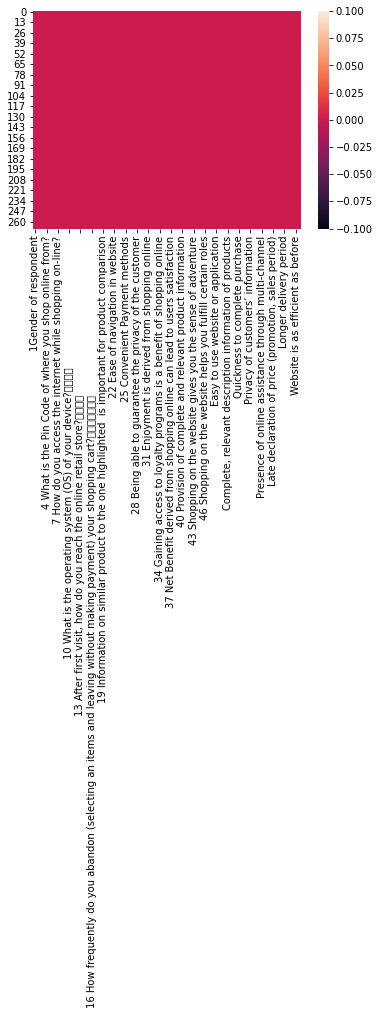

In [10]:
sns.heatmap(df.isnull())
plt.show()

In [11]:
##Exploratory Data Analysis
for i in df.columns:
    print(i)
    print('num of unique values -->',df[i].nunique())
    if df[i].nunique()<15:
        print(df[i].unique())
    else:
        print(df[i].describe())
    print('*********************************************')


1Gender of respondent
num of unique values --> 2
['Male' 'Female']
*********************************************
2 How old are you? 
num of unique values --> 5
['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']
*********************************************
3 Which city do you shop online from?
num of unique values --> 11
['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']
*********************************************
4 What is the Pin Code of where you shop online from?
num of unique values --> 39
count       269.000000
mean     220465.747212
std      140524.341051
min      110008.000000
25%      122018.000000
50%      201303.000000
75%      201310.000000
max      560037.000000
Name: 4 What is the Pin Code of where you shop online from?, dtype: float64
*********************************************
5 Since How Long You are Shopping Online ?
num of unique values --> 5
['Above 4 yea

In [12]:
#Separating categorical and numerical columns

cat_df,num_df=[],[]
for i in df:
    if df[i].dtypes=='O':
        cat_df.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'):
        num_df.append(i)
    else: print('Unknown >',i)
    
print('Total number of features:',df.shape[1])
print('Number of Categorical features:',len(cat_df))
print('Number of Numerical features:',len(num_df))

Total number of features: 71
Number of Categorical features: 70
Number of Numerical features: 1


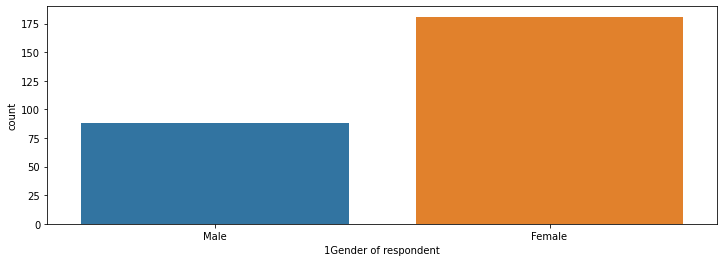

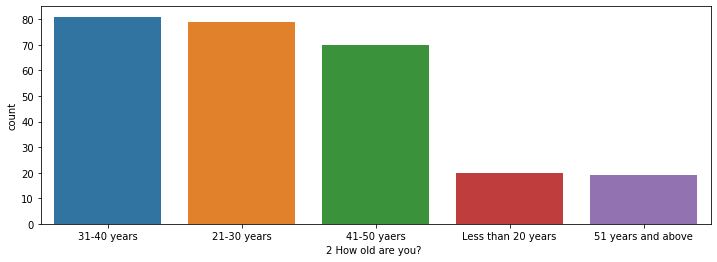

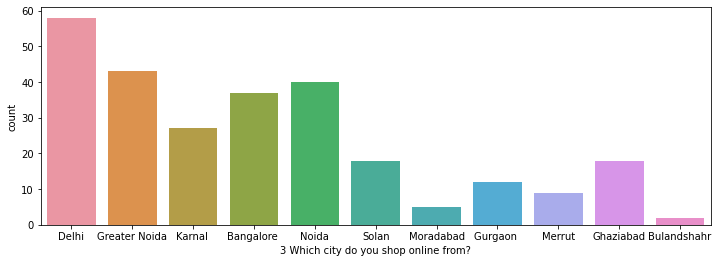

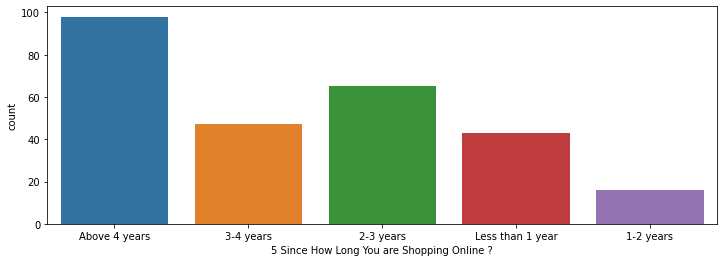

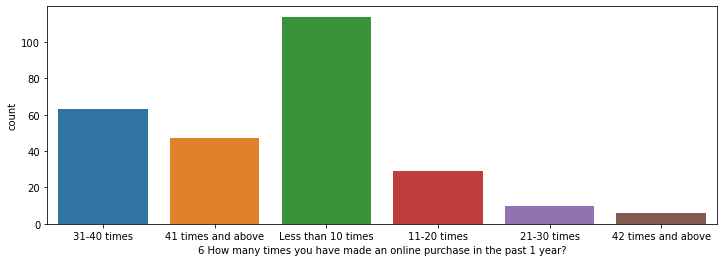

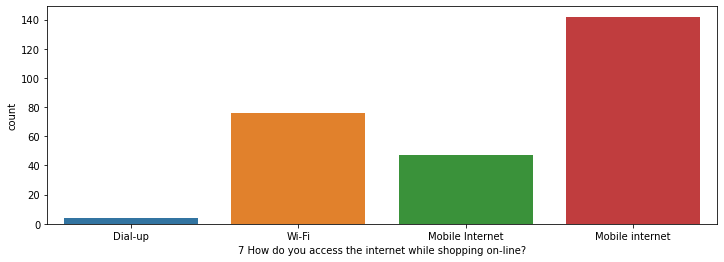

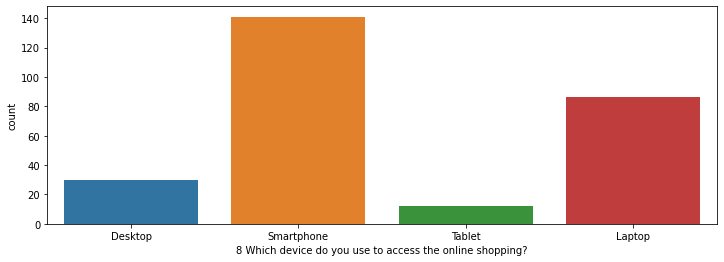

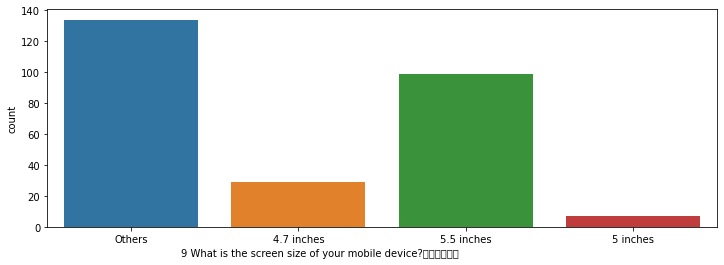

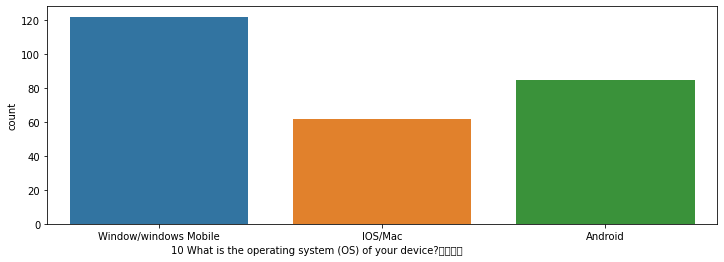

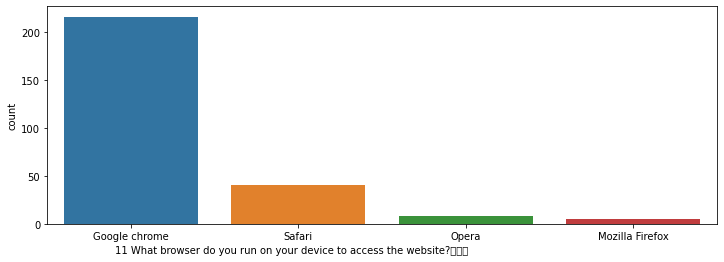

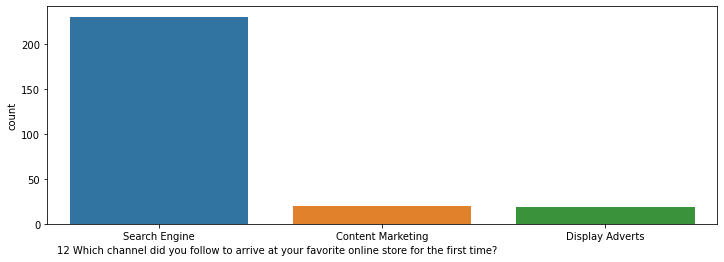

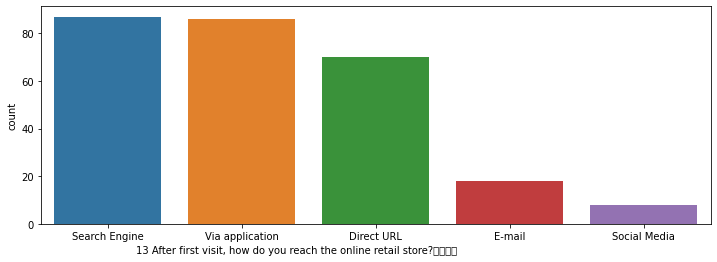

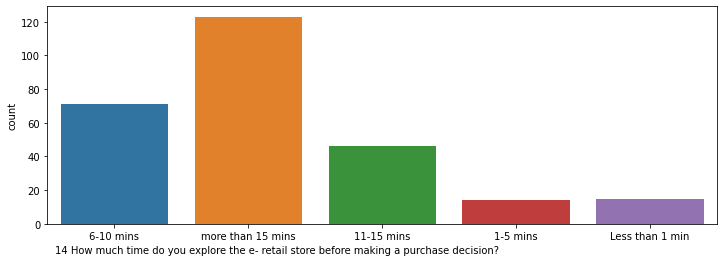

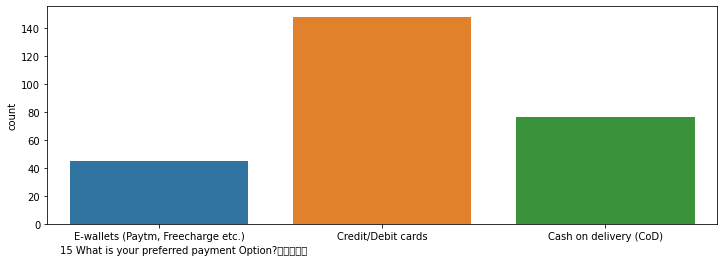

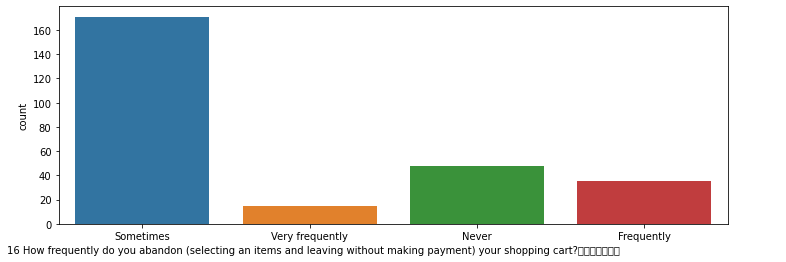

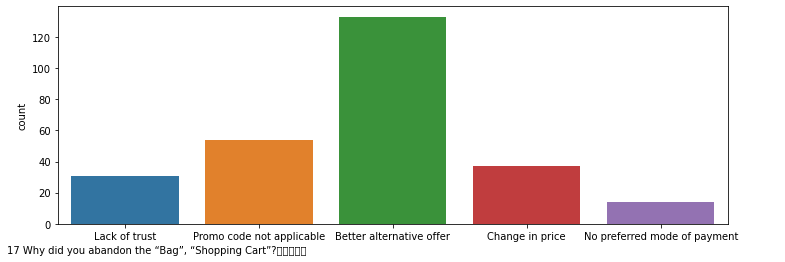

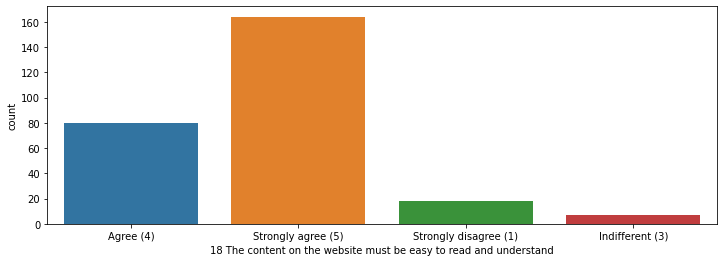

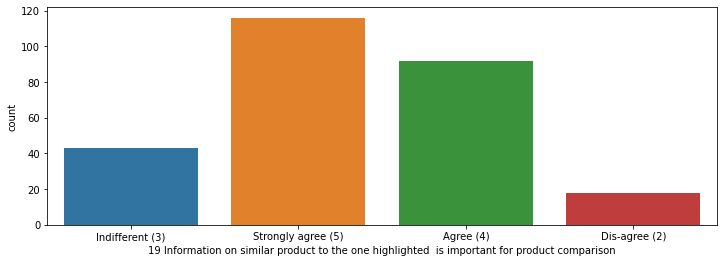

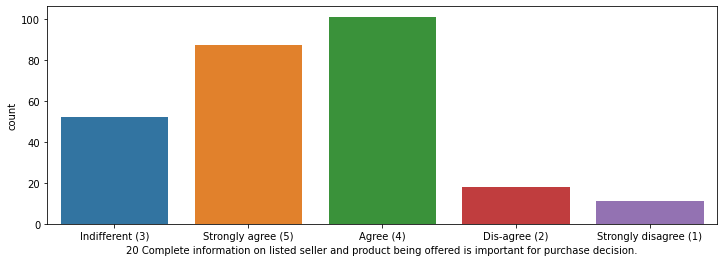

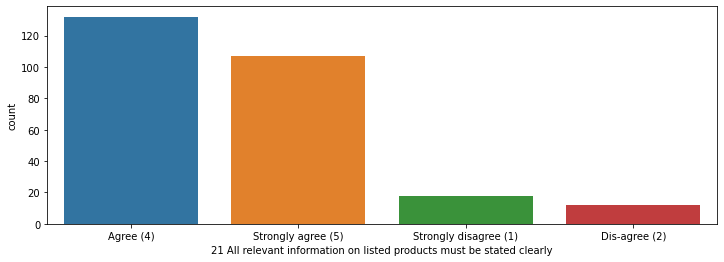

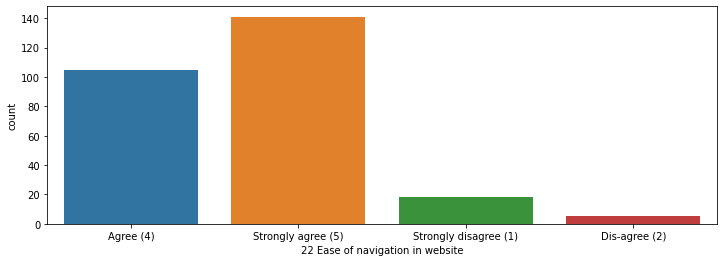

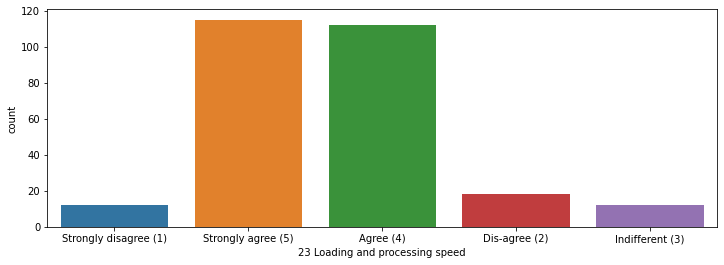

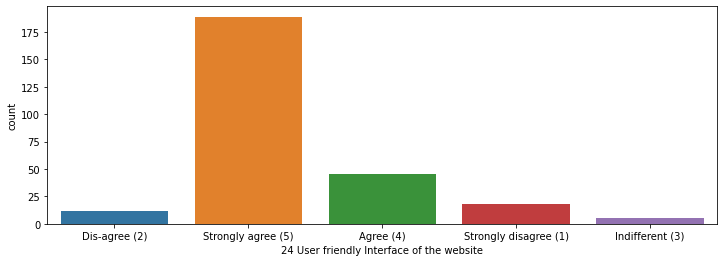

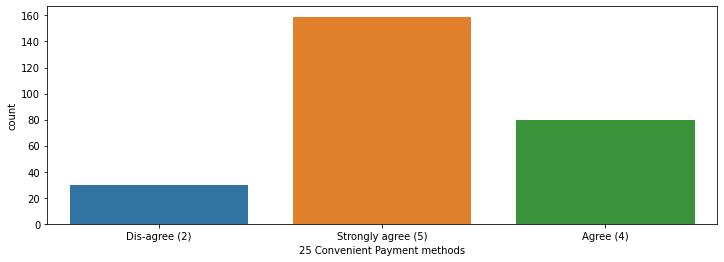

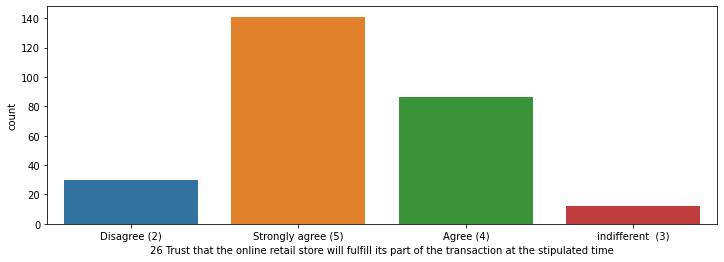

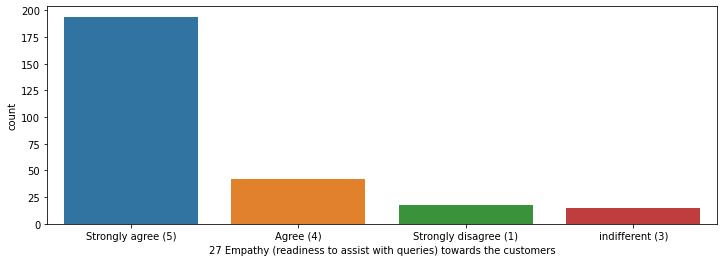

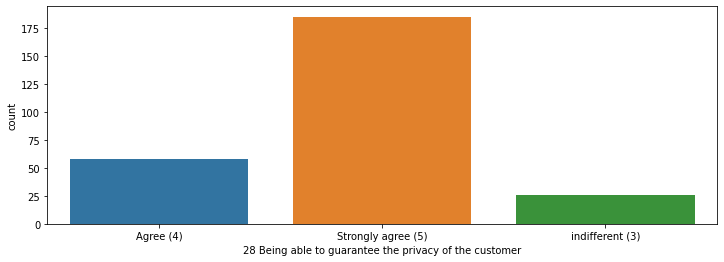

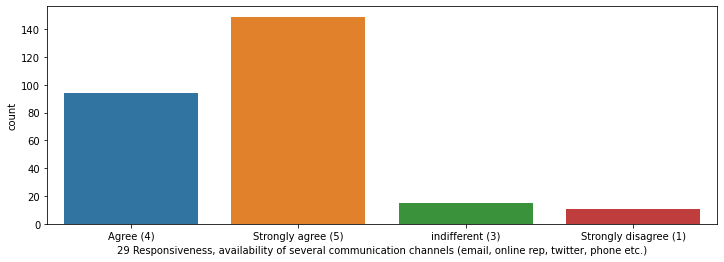

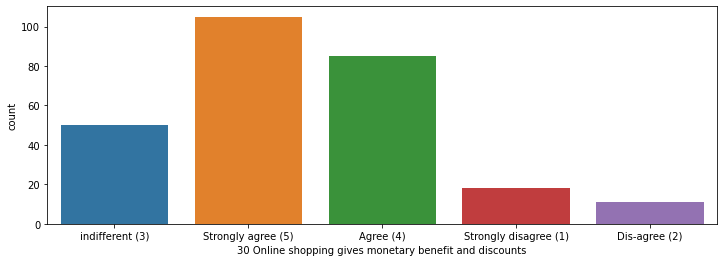

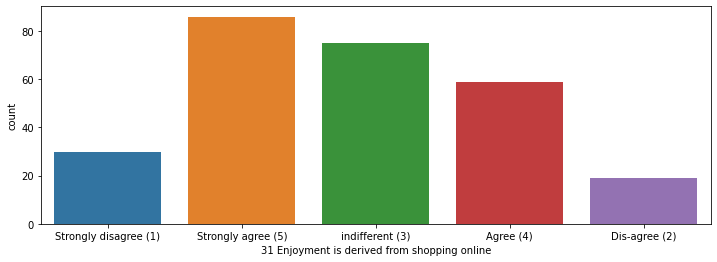

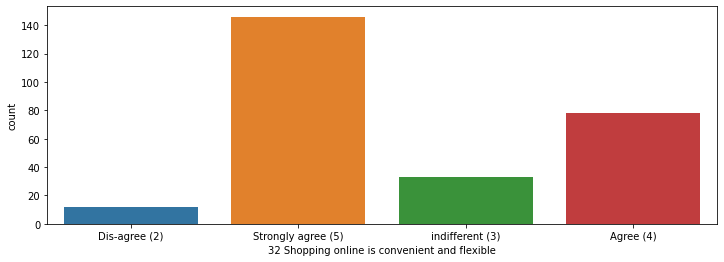

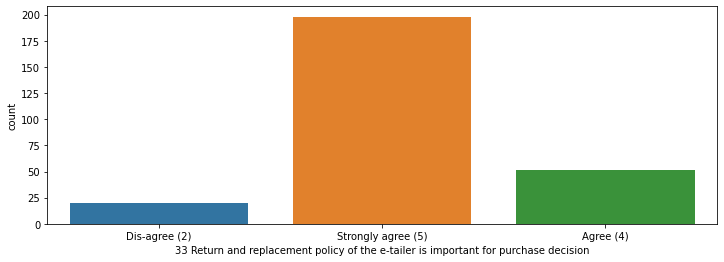

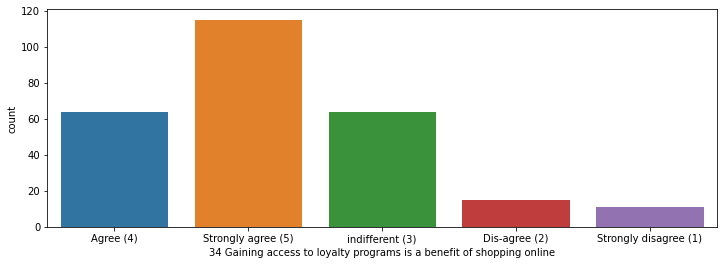

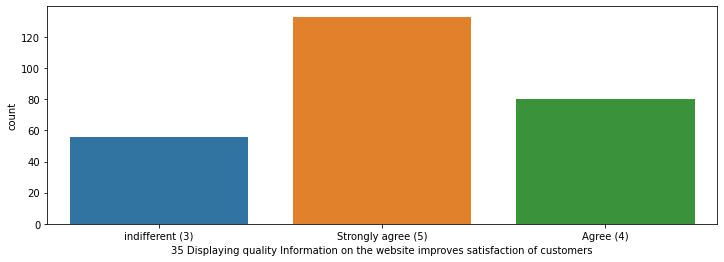

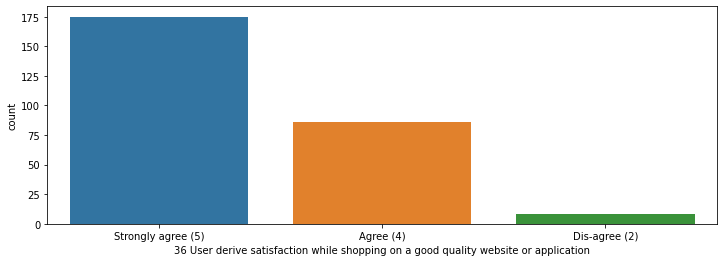

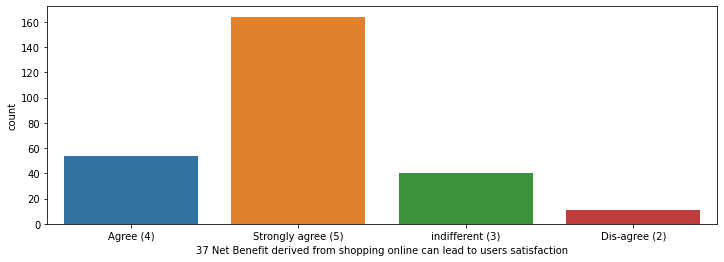

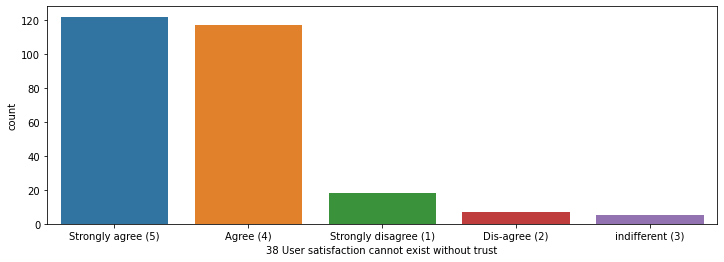

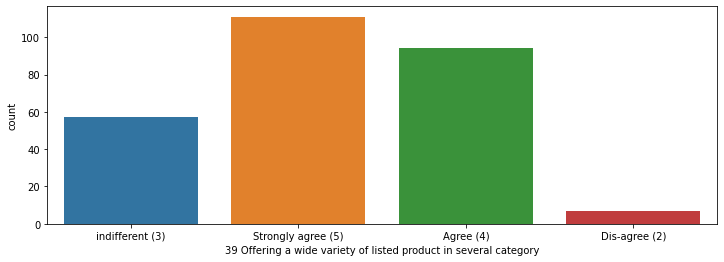

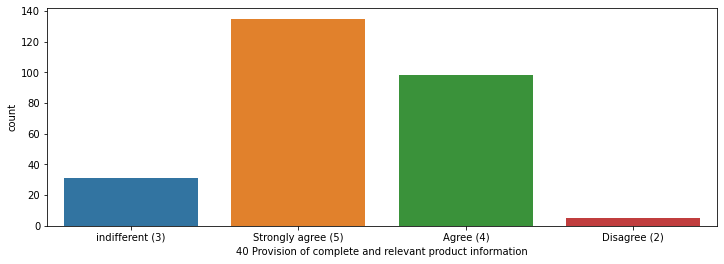

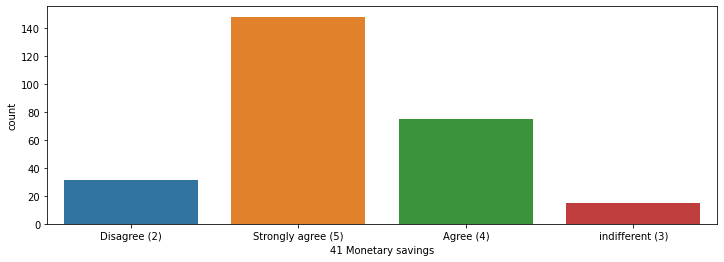

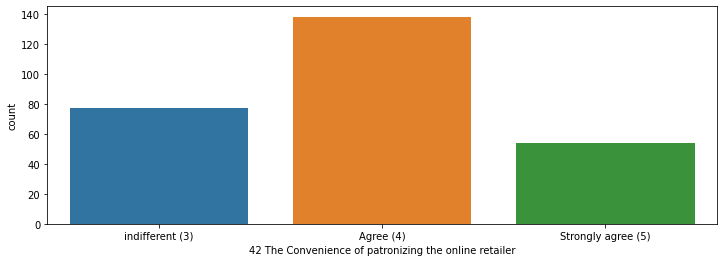

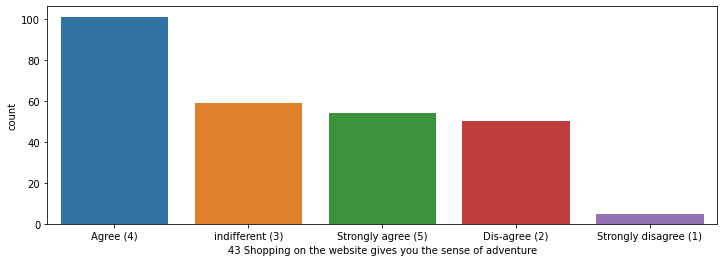

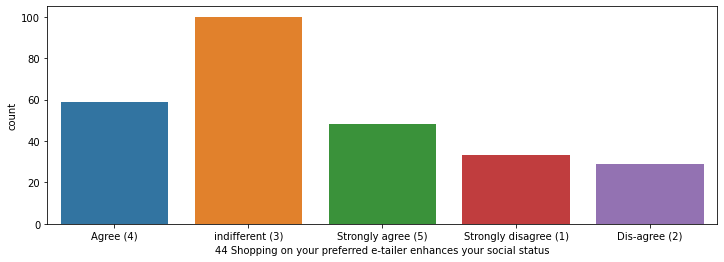

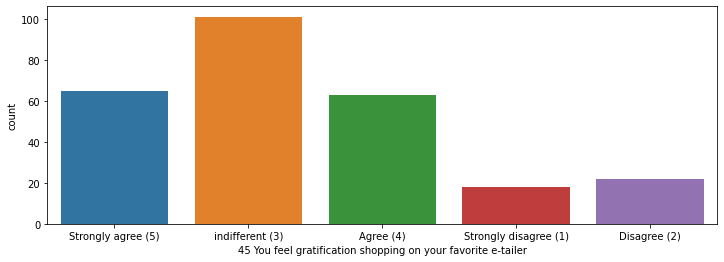

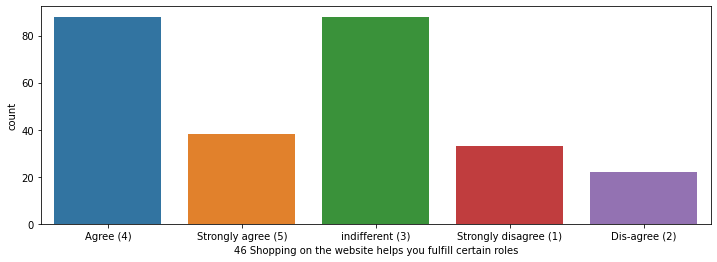

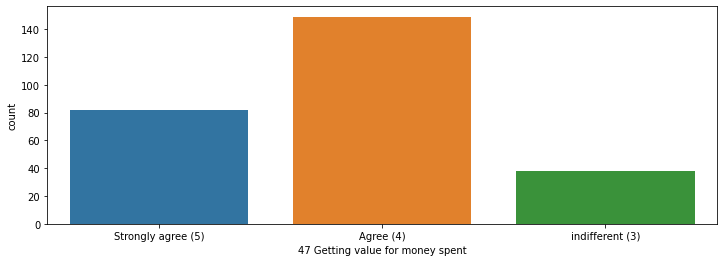

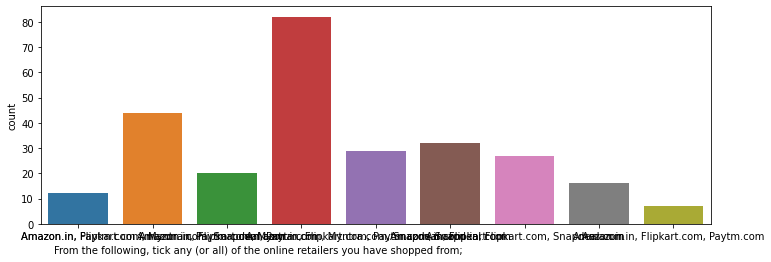

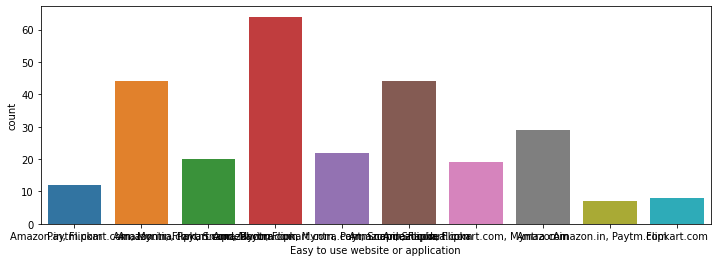

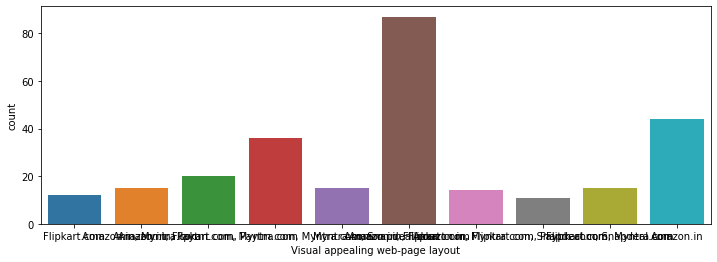

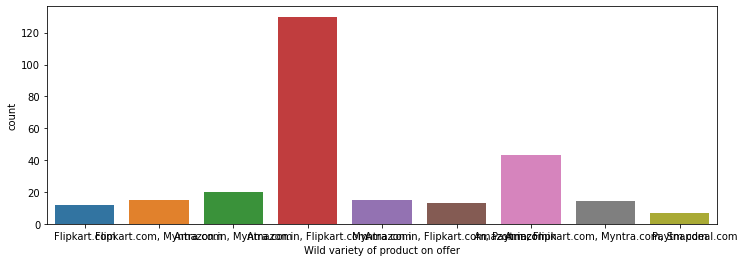

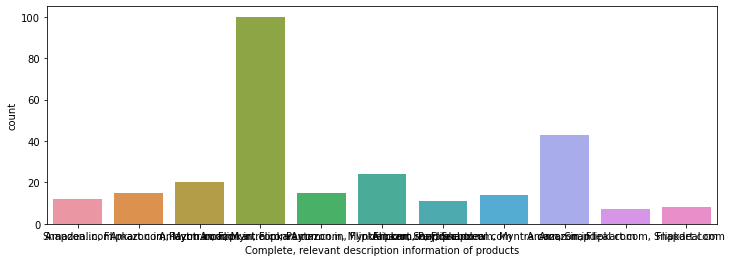

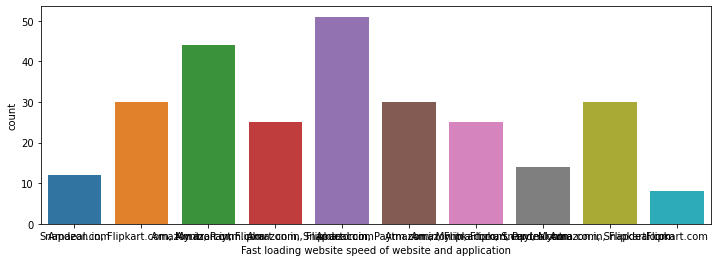

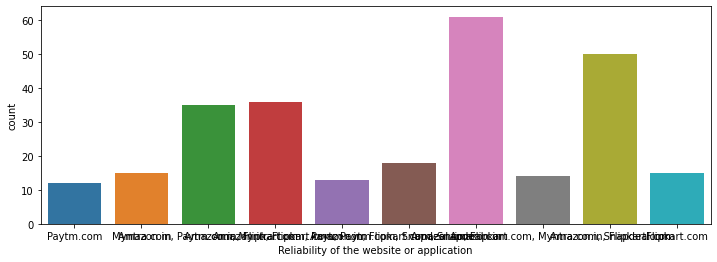

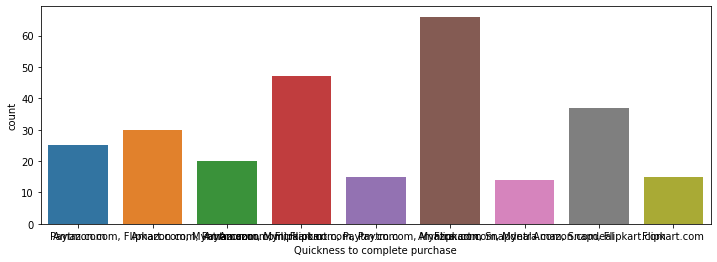

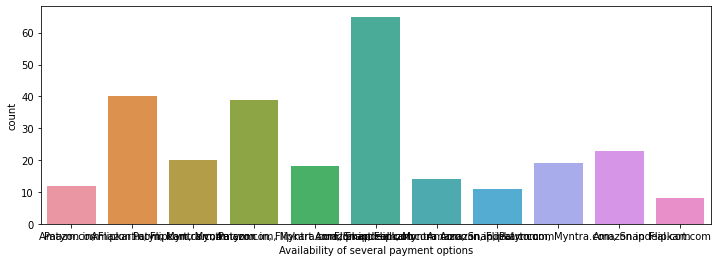

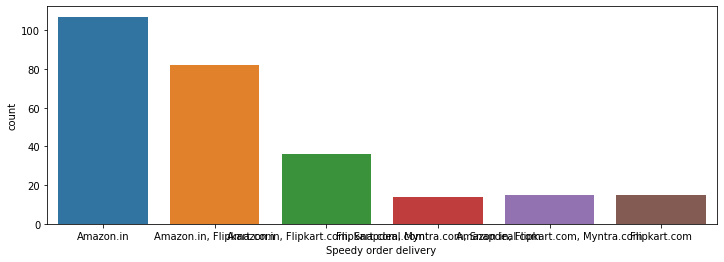

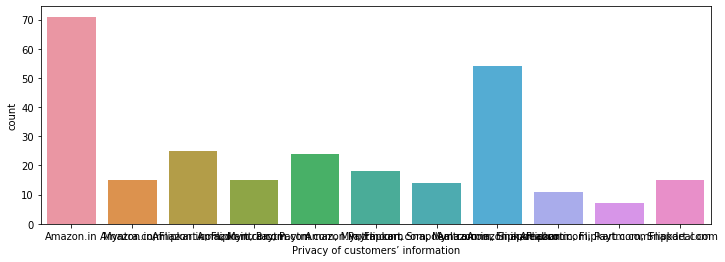

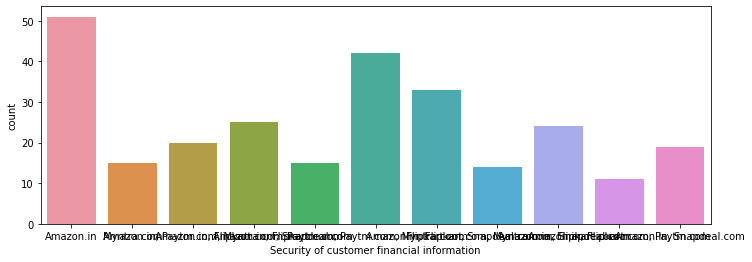

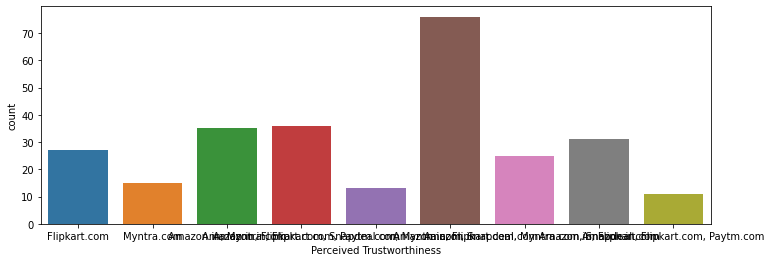

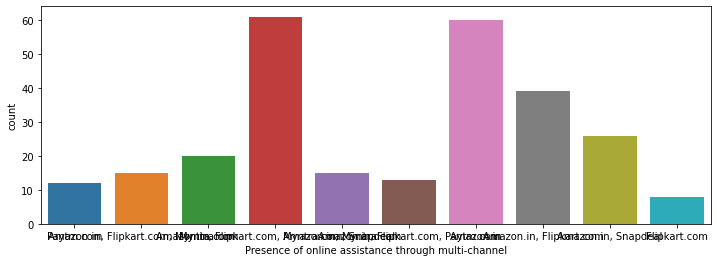

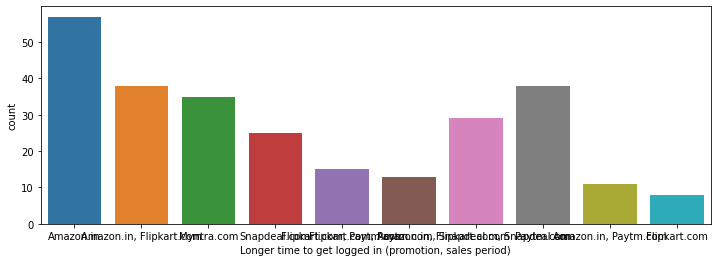

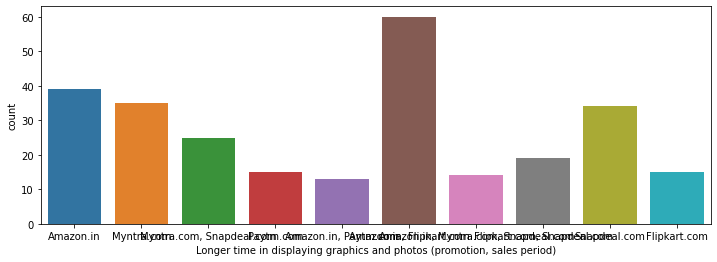

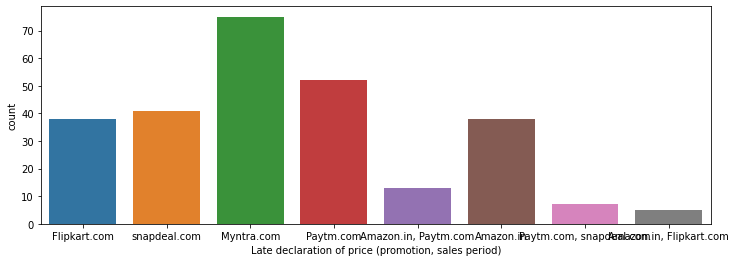

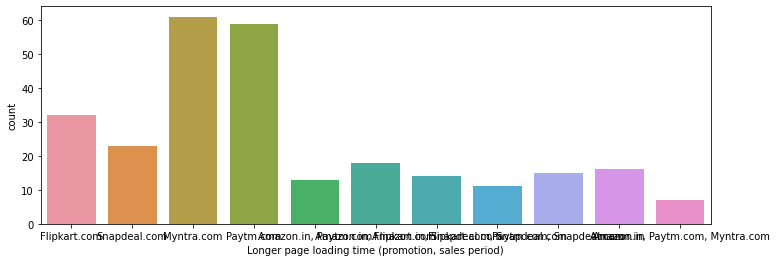

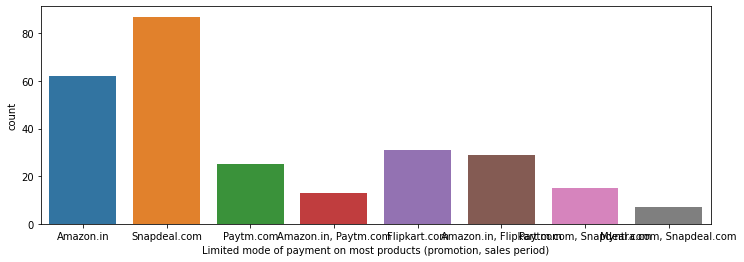

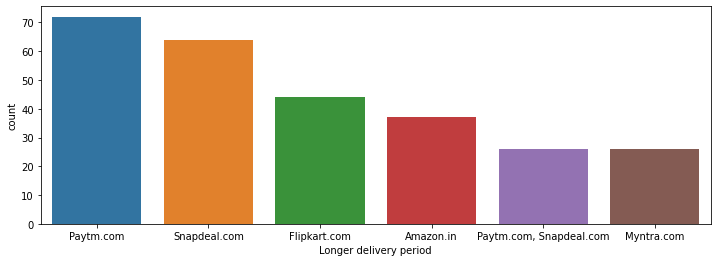

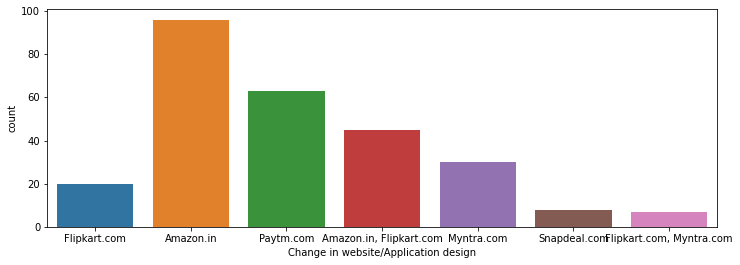

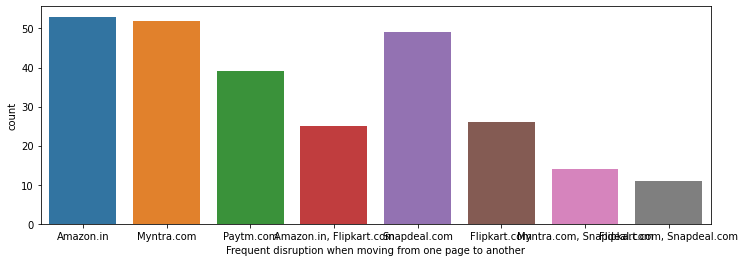

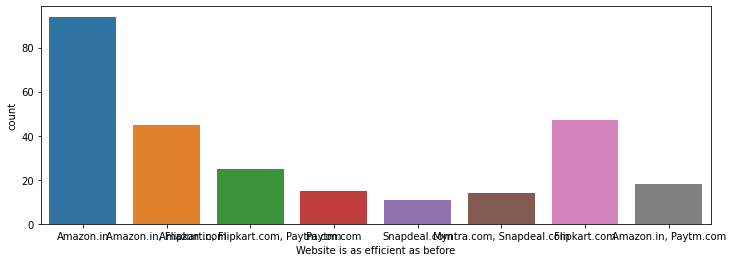

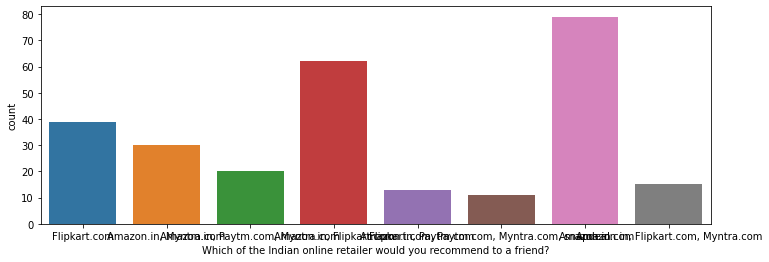

In [13]:
for i in cat_df:
    f=plt.figure(figsize=(12,4))
    f.add_subplot(1,1,1)
    sns.countplot(df[i])

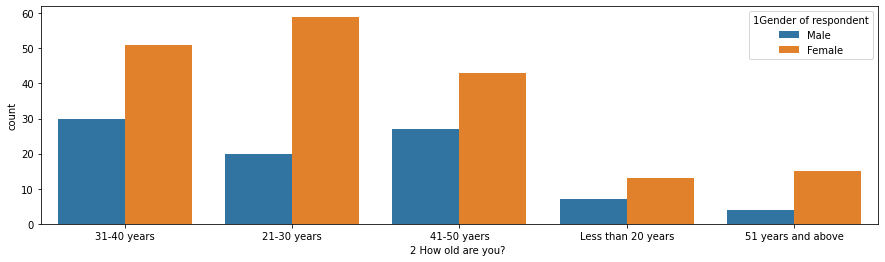

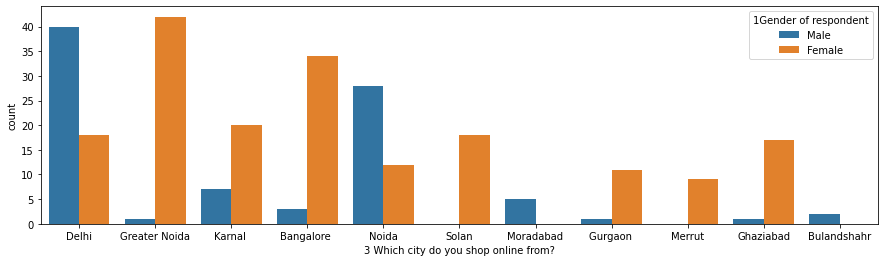

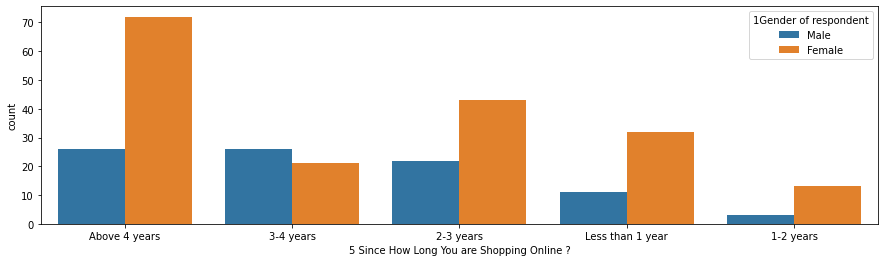

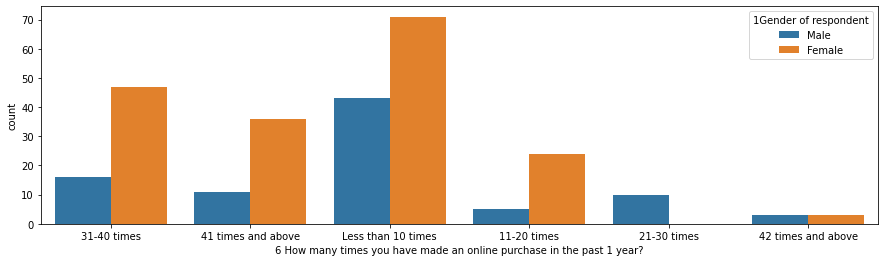

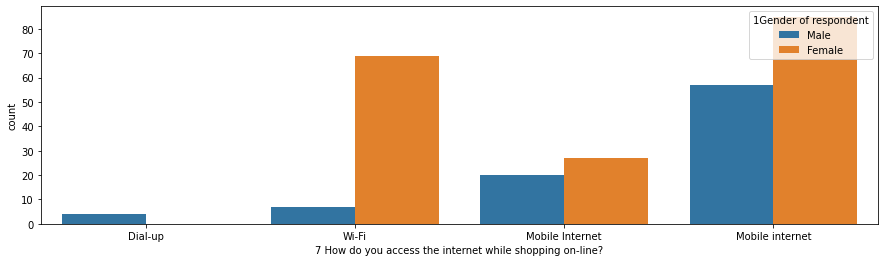

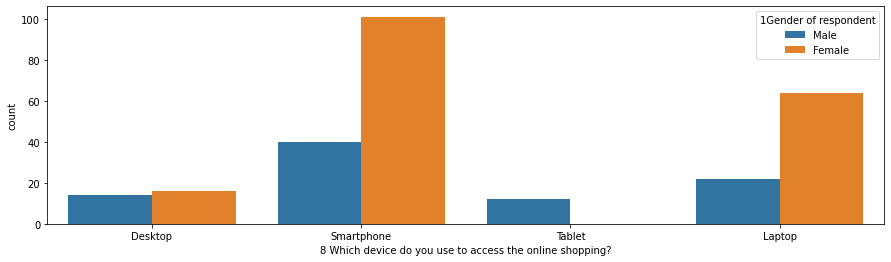

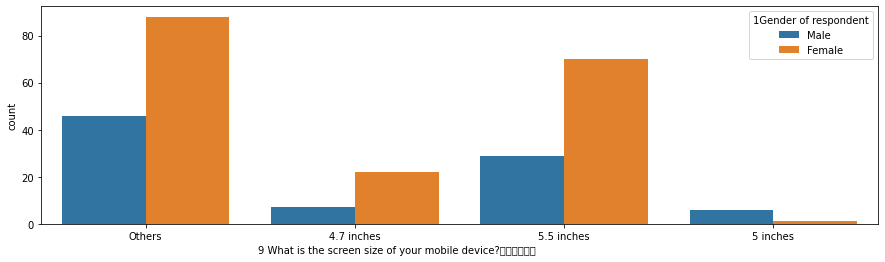

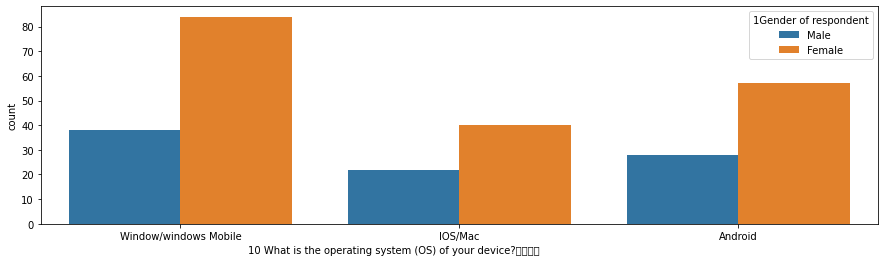

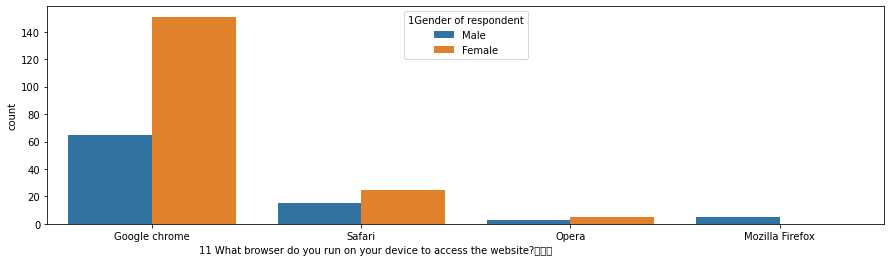

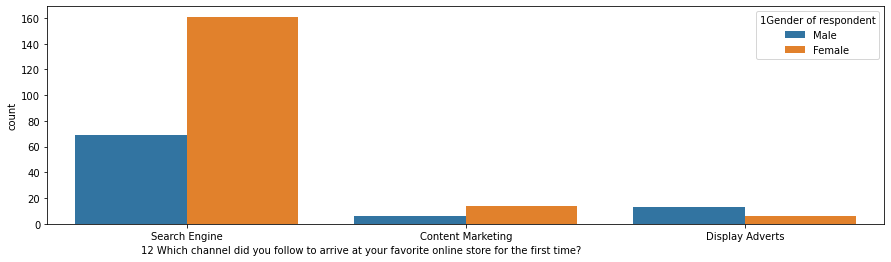

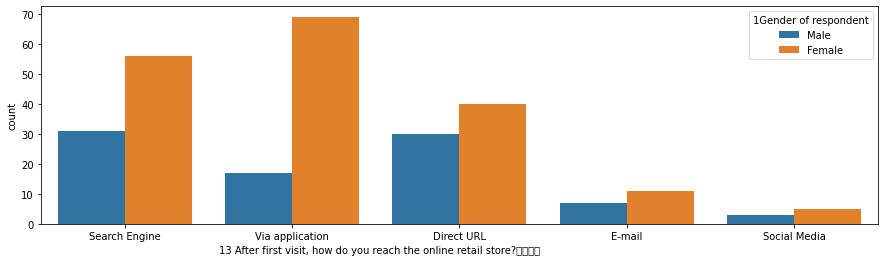

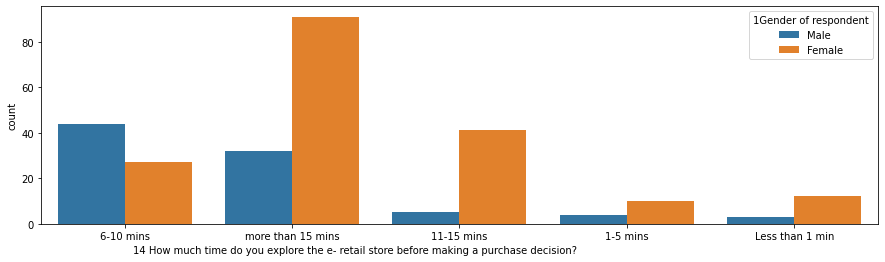

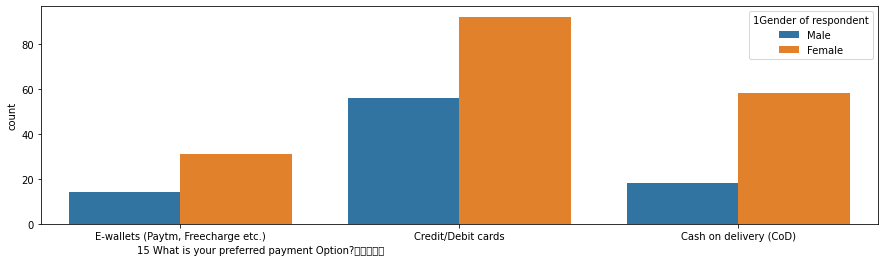

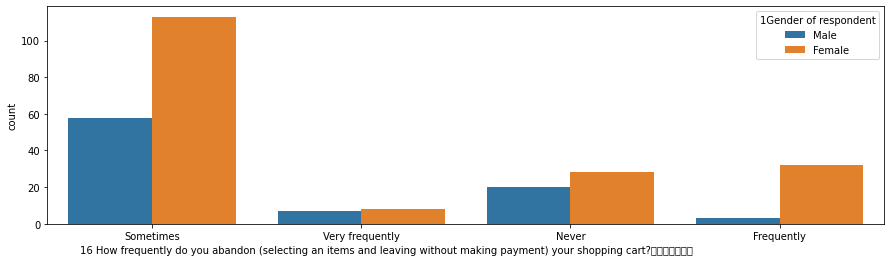

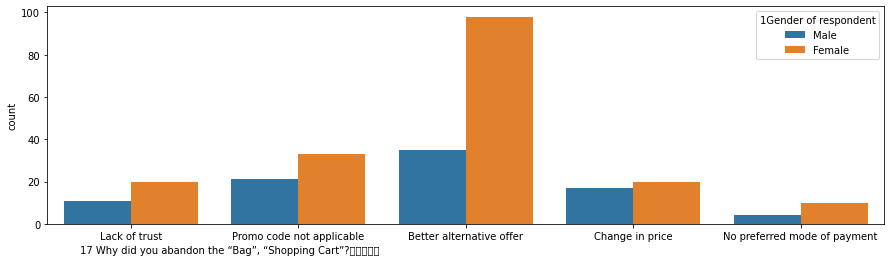

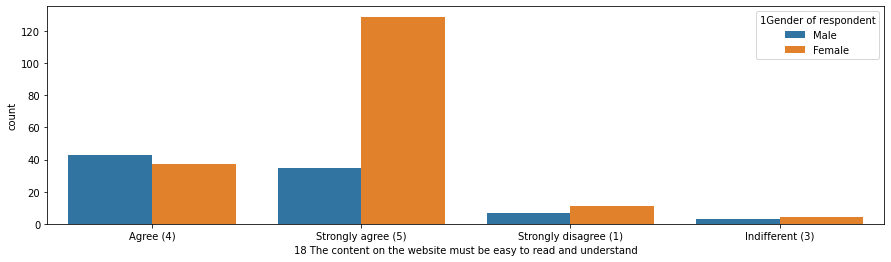

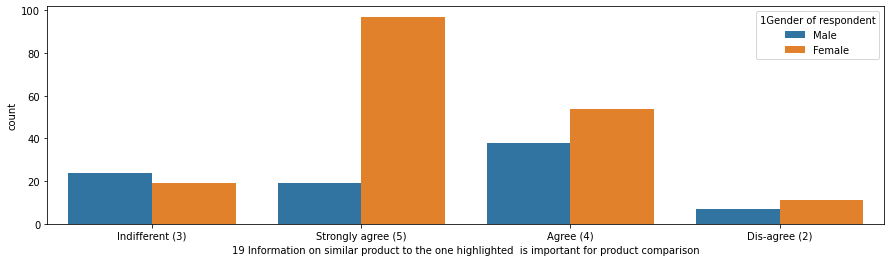

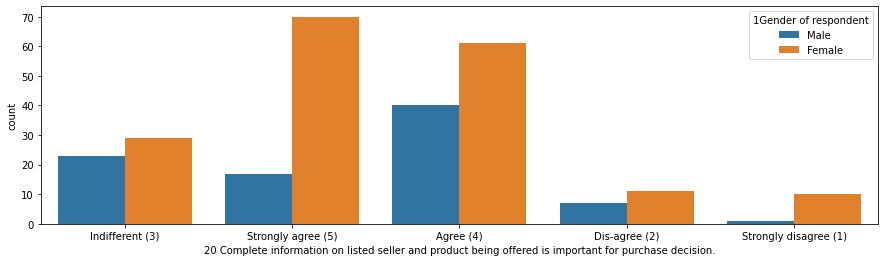

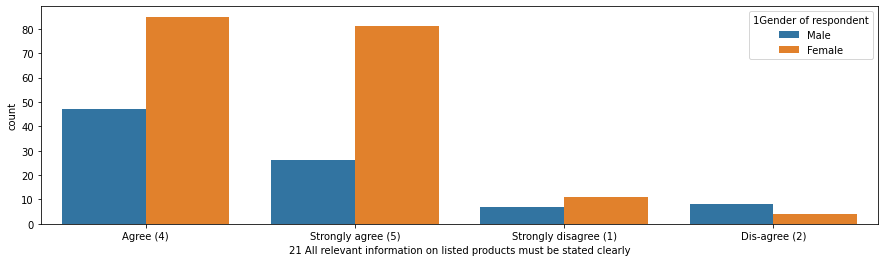

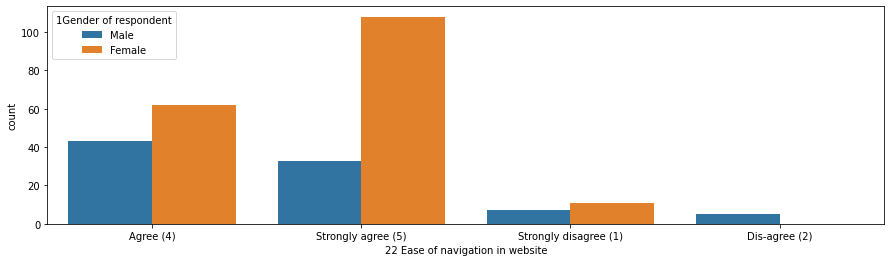

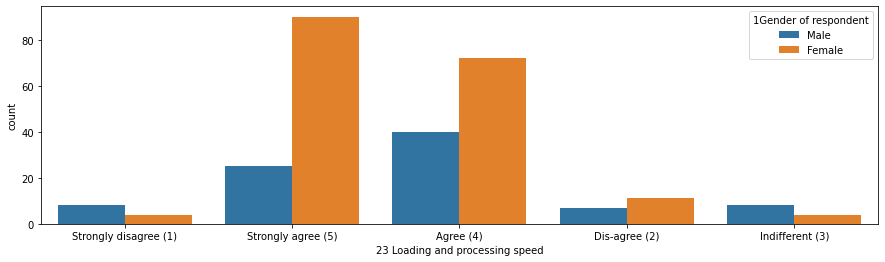

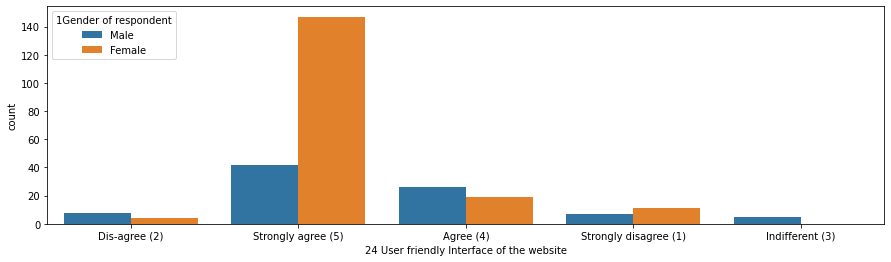

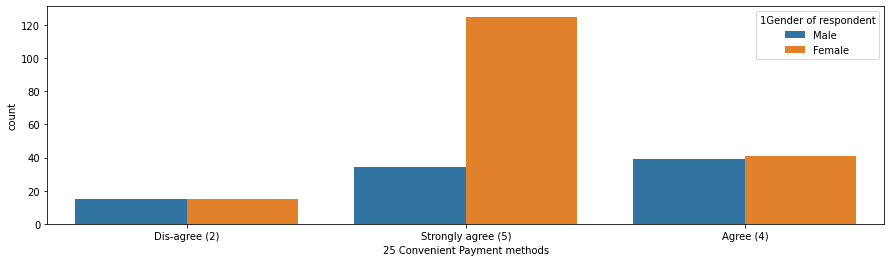

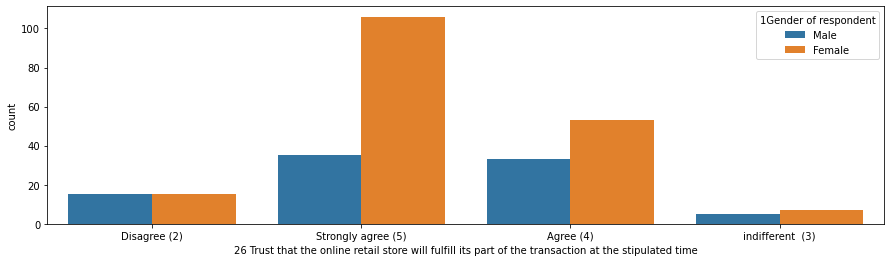

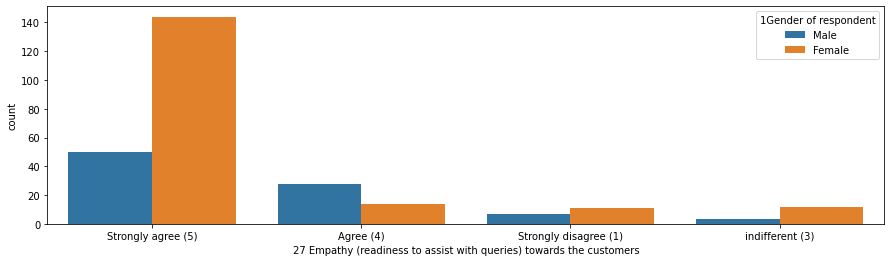

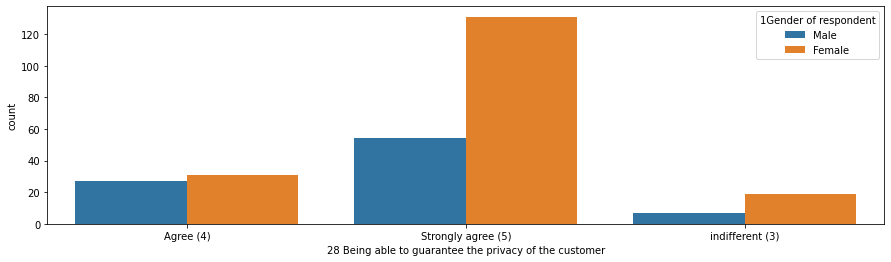

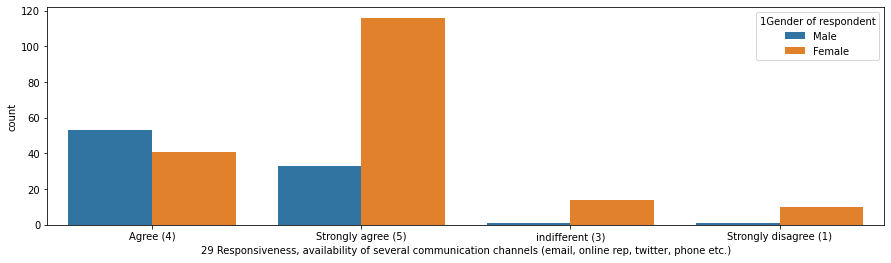

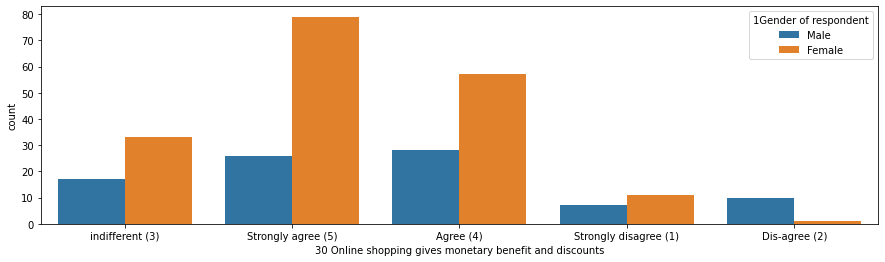

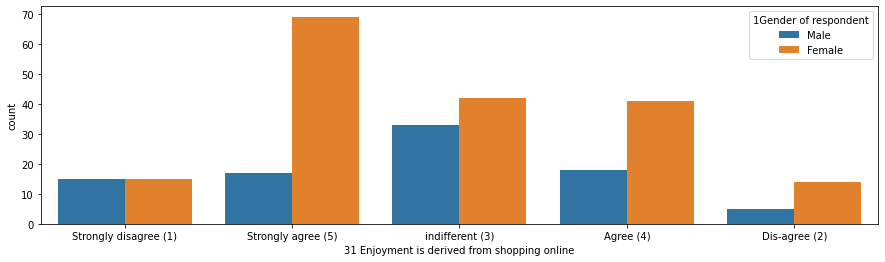

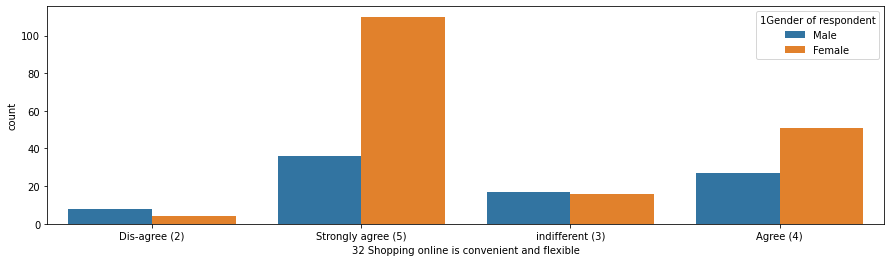

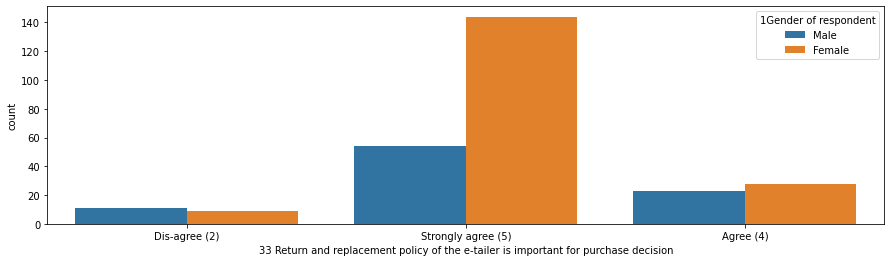

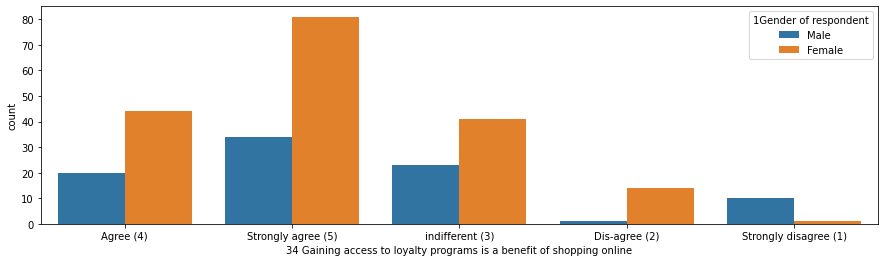

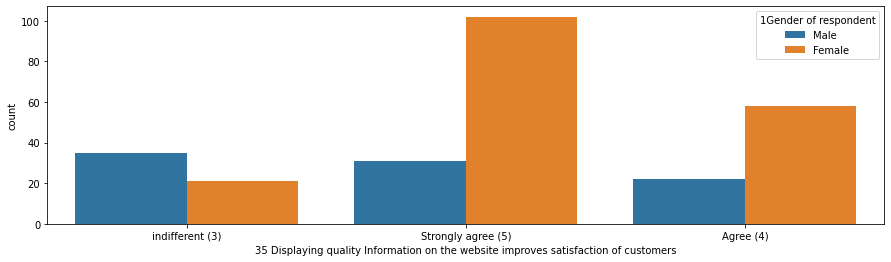

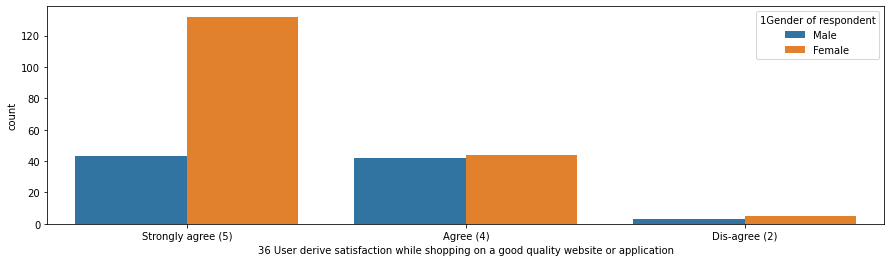

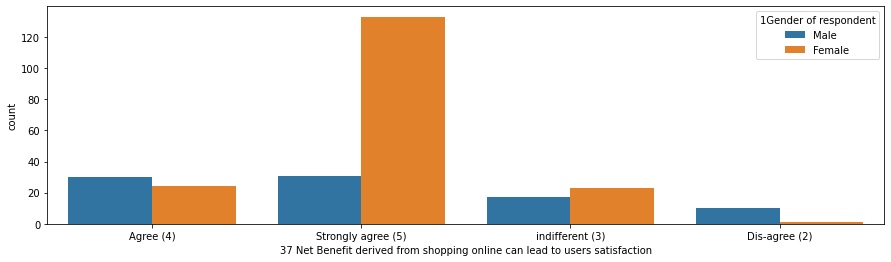

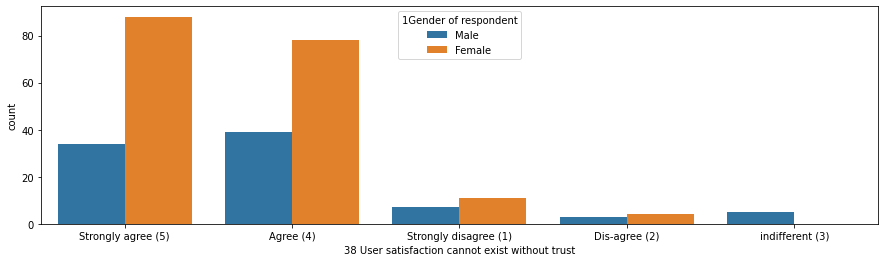

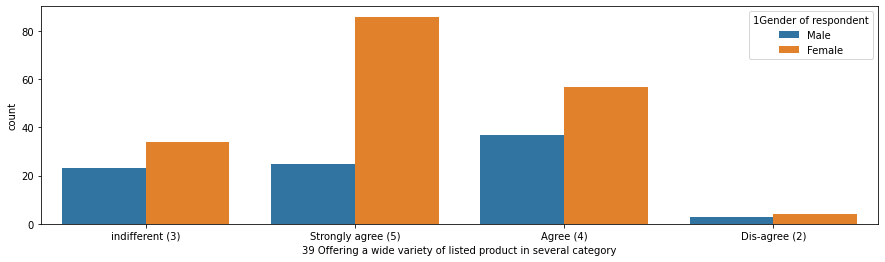

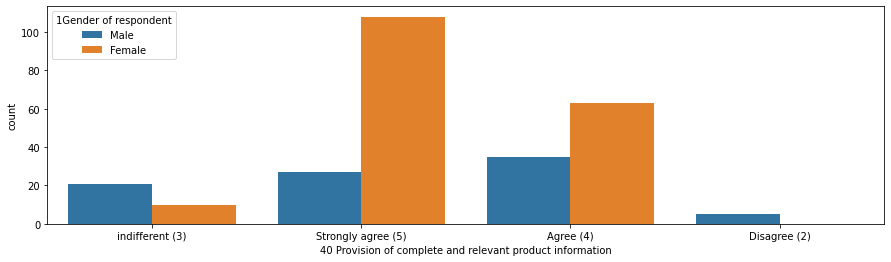

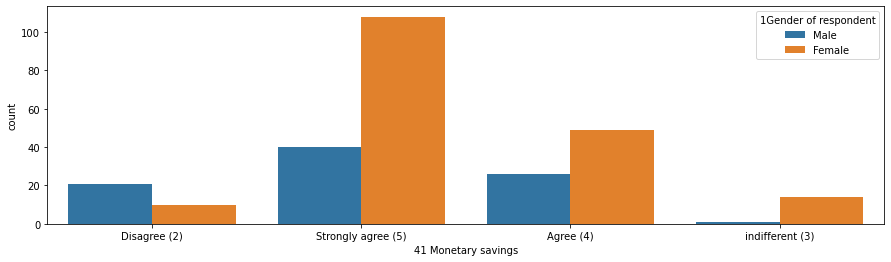

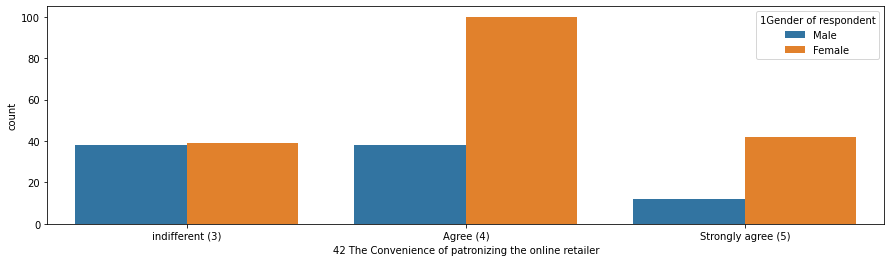

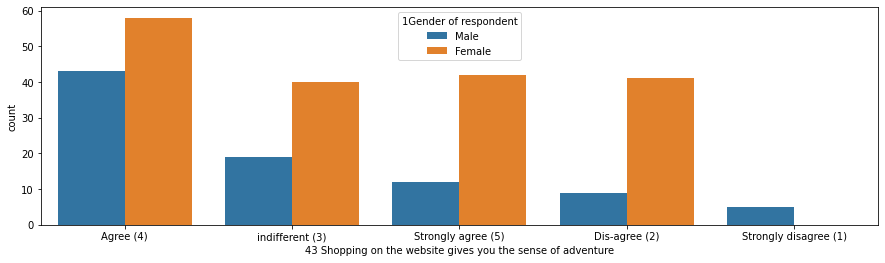

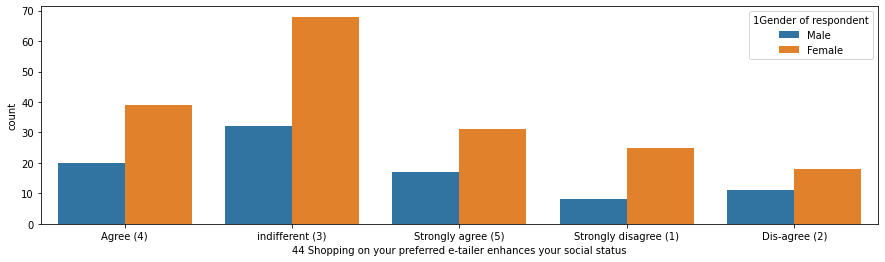

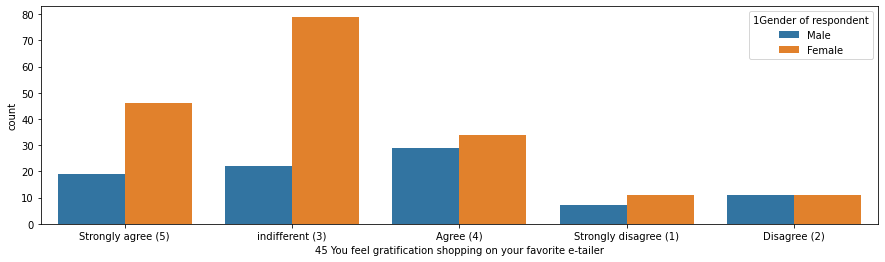

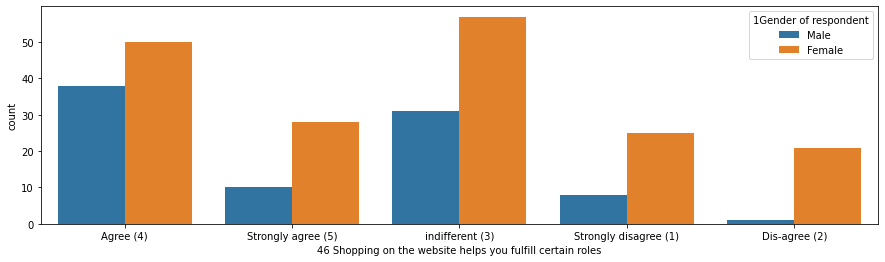

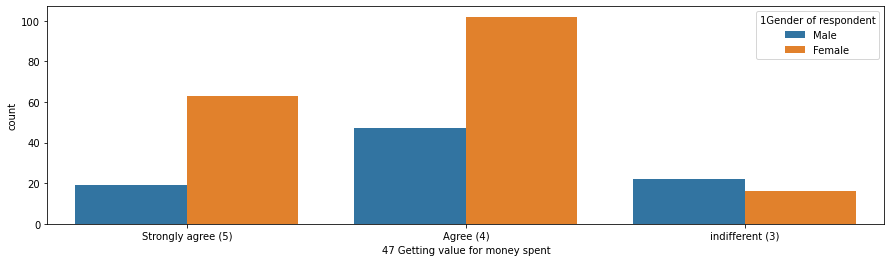

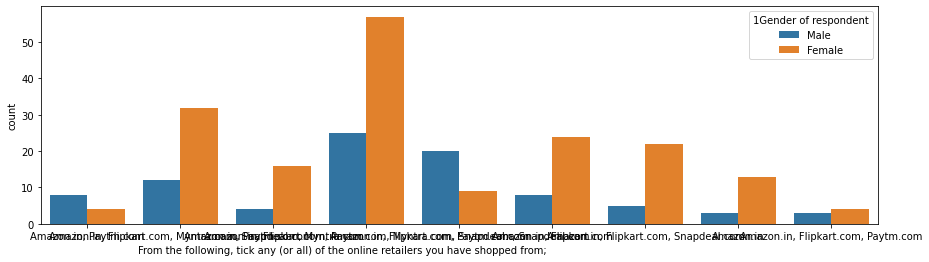

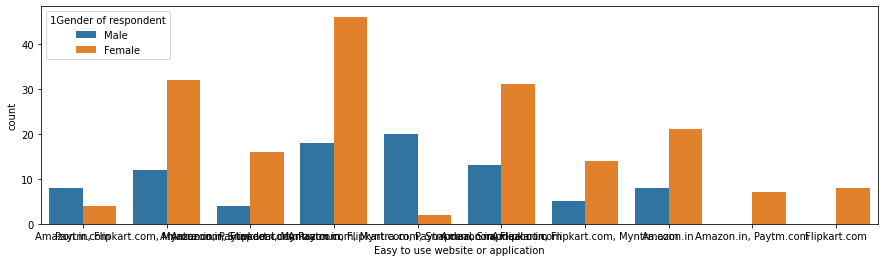

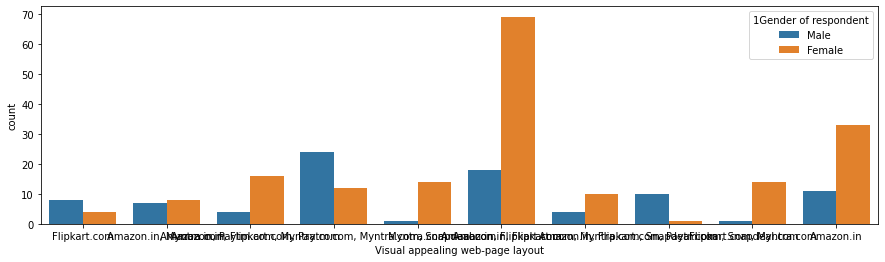

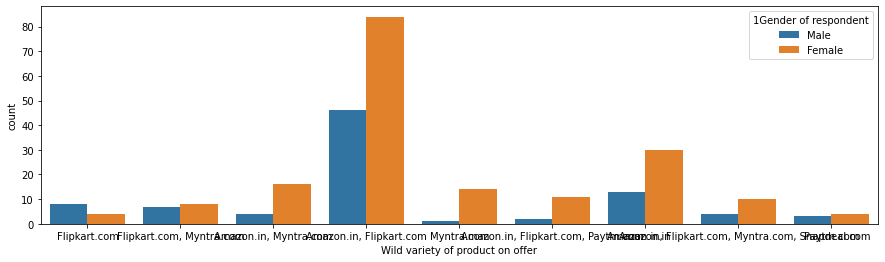

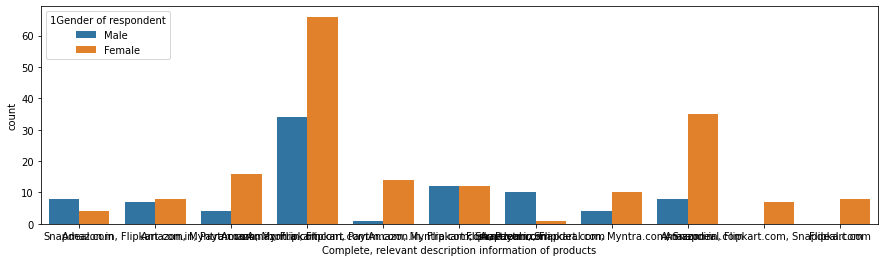

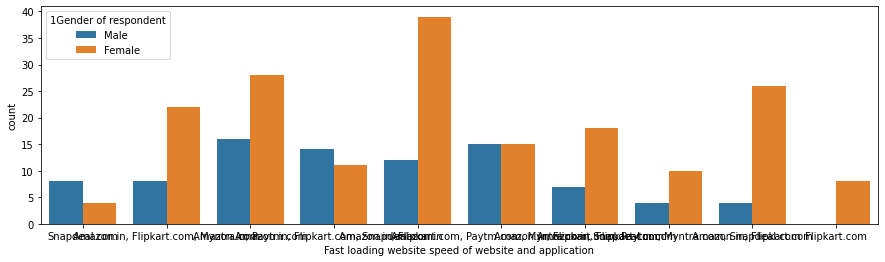

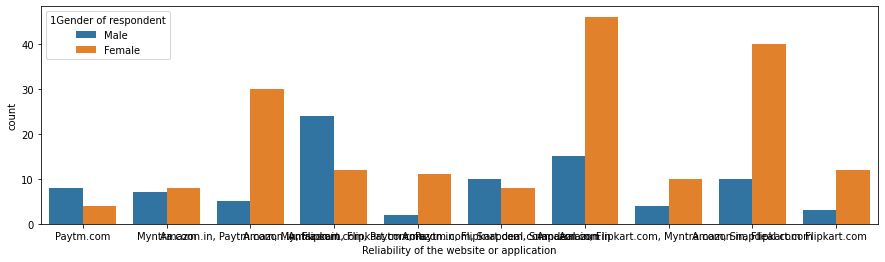

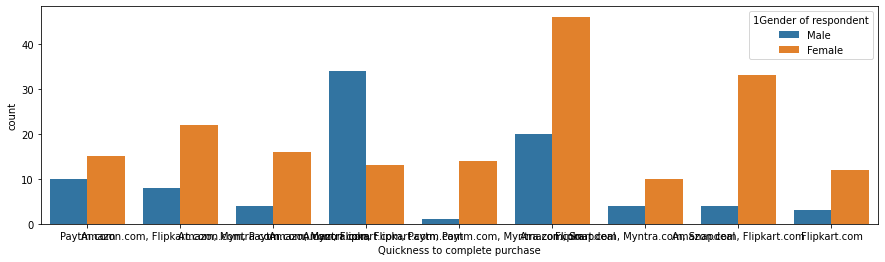

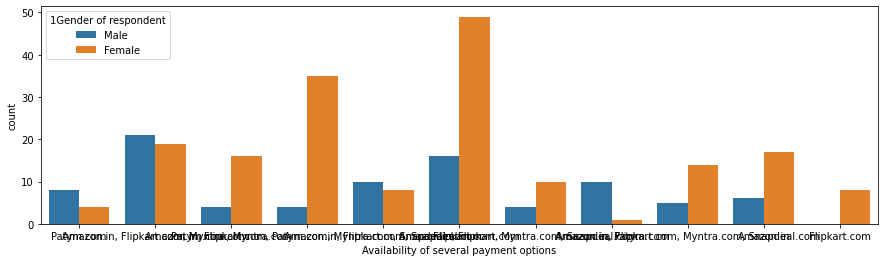

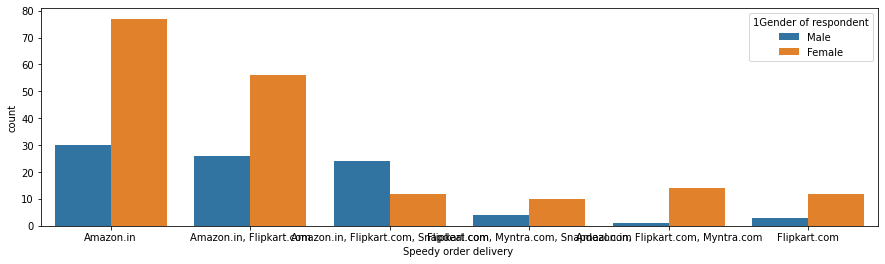

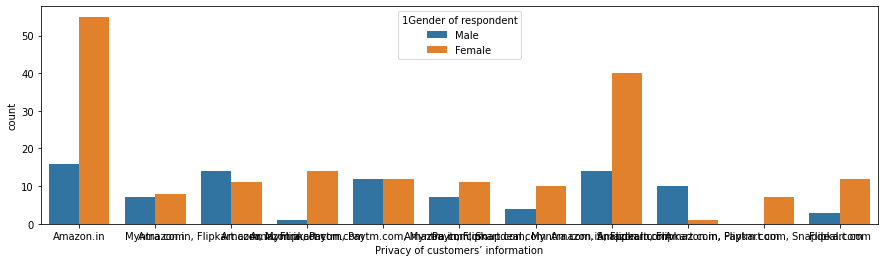

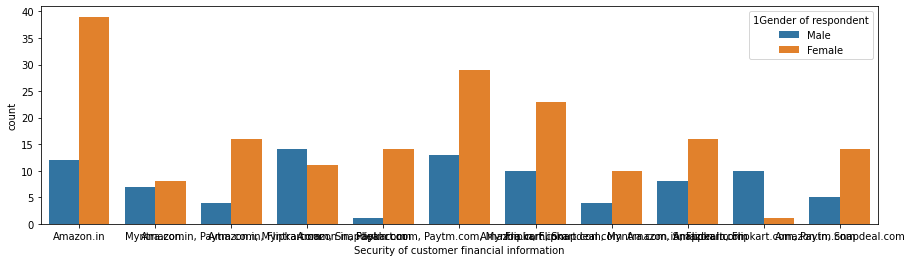

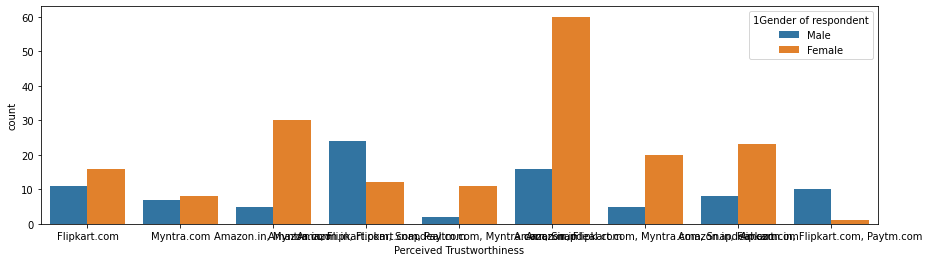

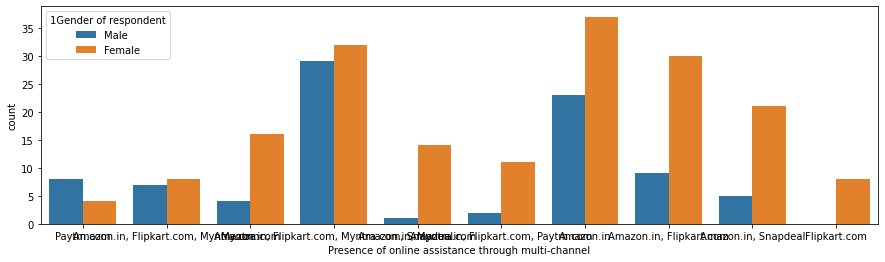

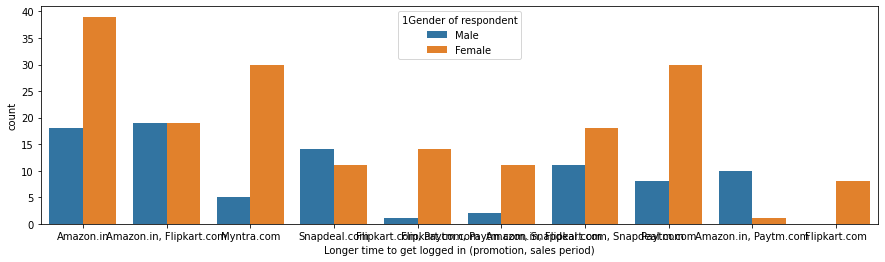

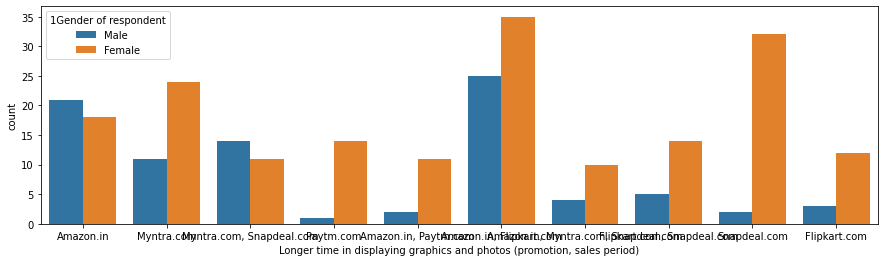

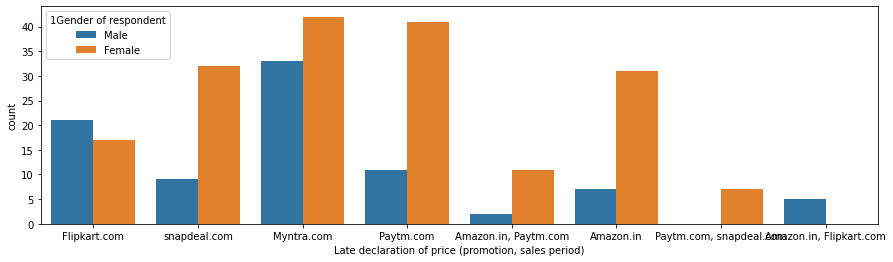

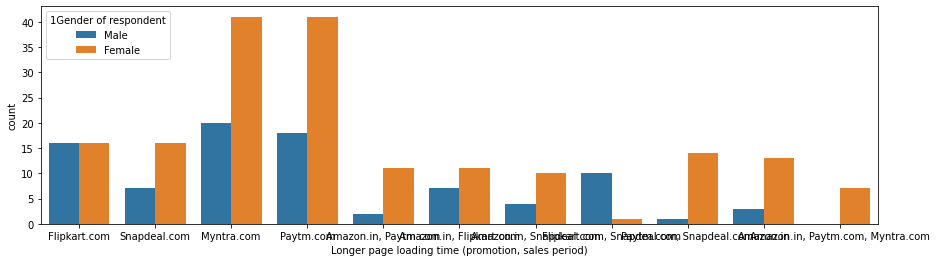

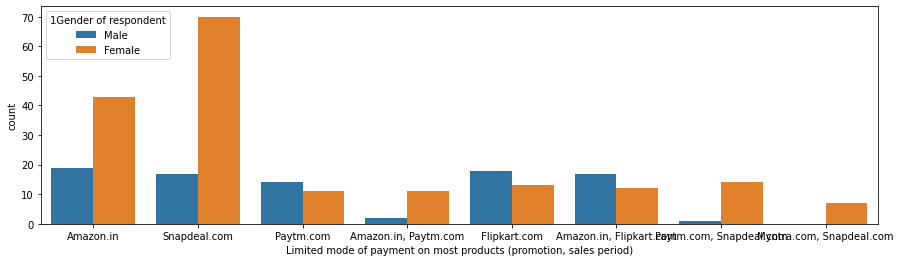

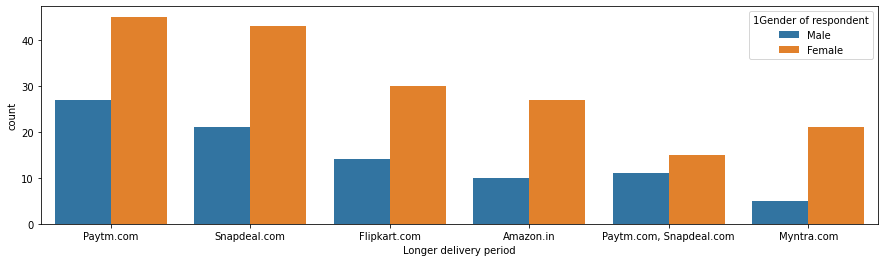

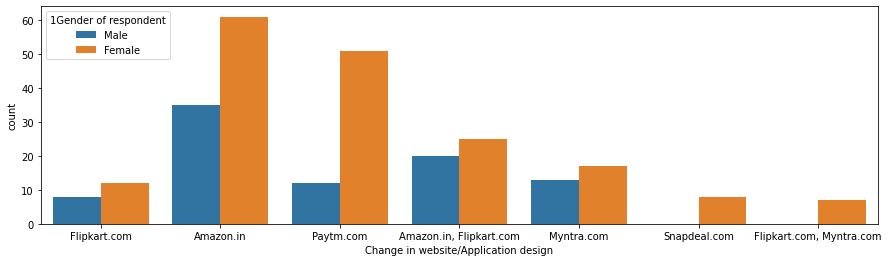

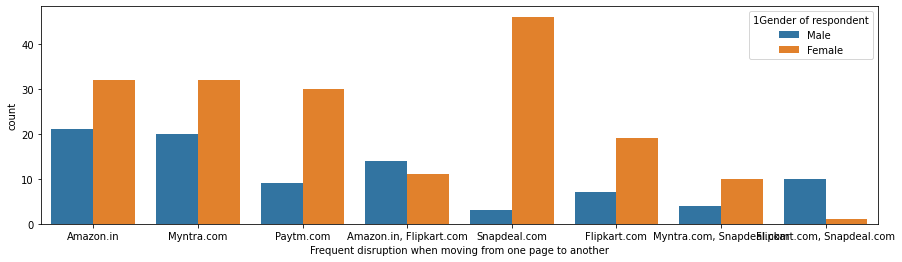

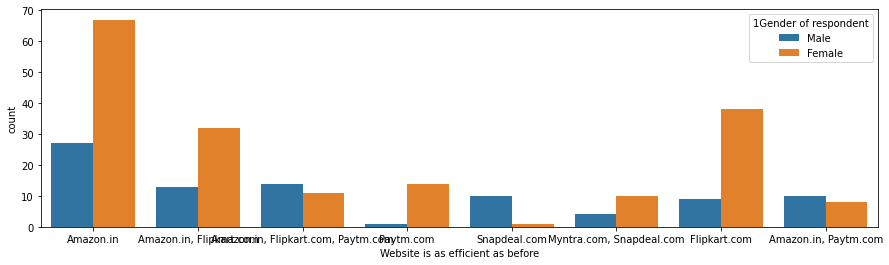

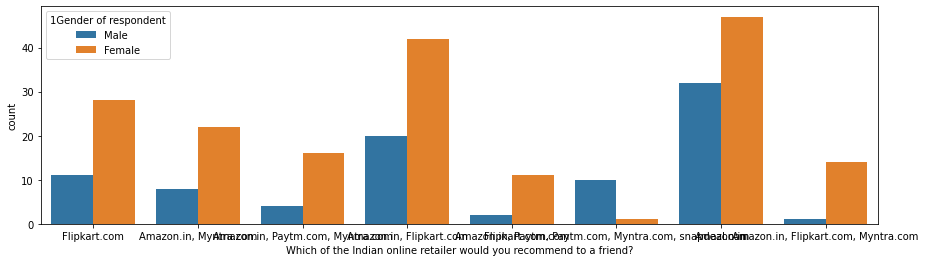

In [14]:
for i in [x for x in df.columns if x not in num_df + ['1Gender of respondent']]:
    plt.figure(figsize=(15,4))
    sns.countplot(x=i,data=df,hue='1Gender of respondent')

Text(0, 0.5, 'Efficiency')

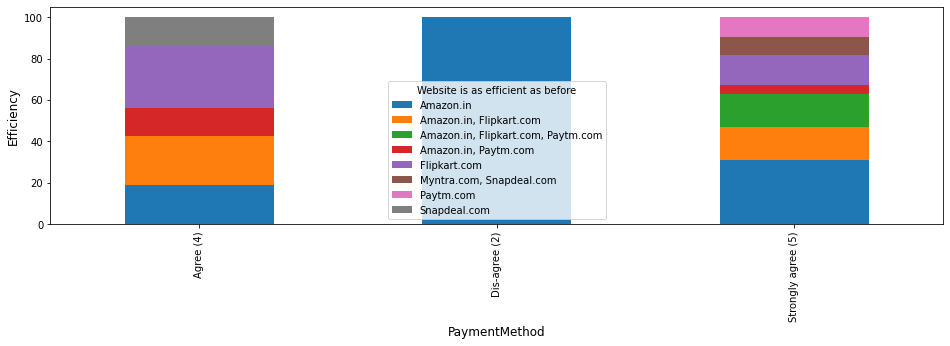

In [15]:
tbl=pd.crosstab(df['25 Convenient Payment methods'],df['Website is as efficient as before'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('PaymentMethod',fontsize=12)
plt.ylabel('Efficiency',fontsize=12)

Text(0, 0.5, 'Frequent disruption')

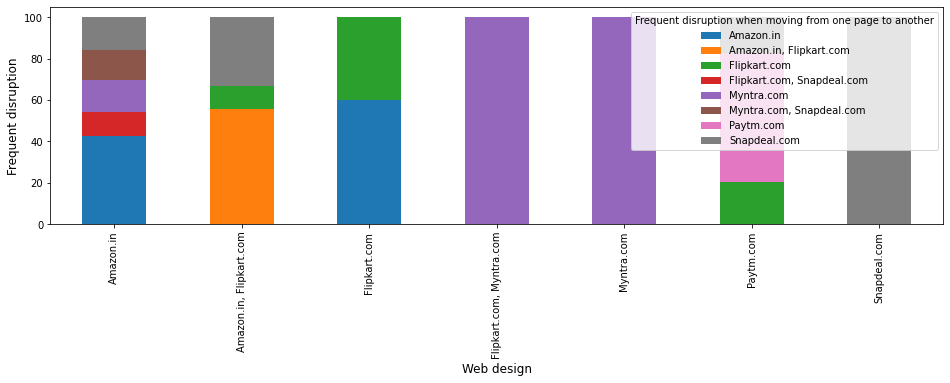

In [16]:
tbl=pd.crosstab(df['Change in website/Application design'],df['Frequent disruption when moving from one page to another'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('Web design',fontsize=12)
plt.ylabel('Frequent disruption',fontsize=12)

Text(0, 0.5, '% of trust')

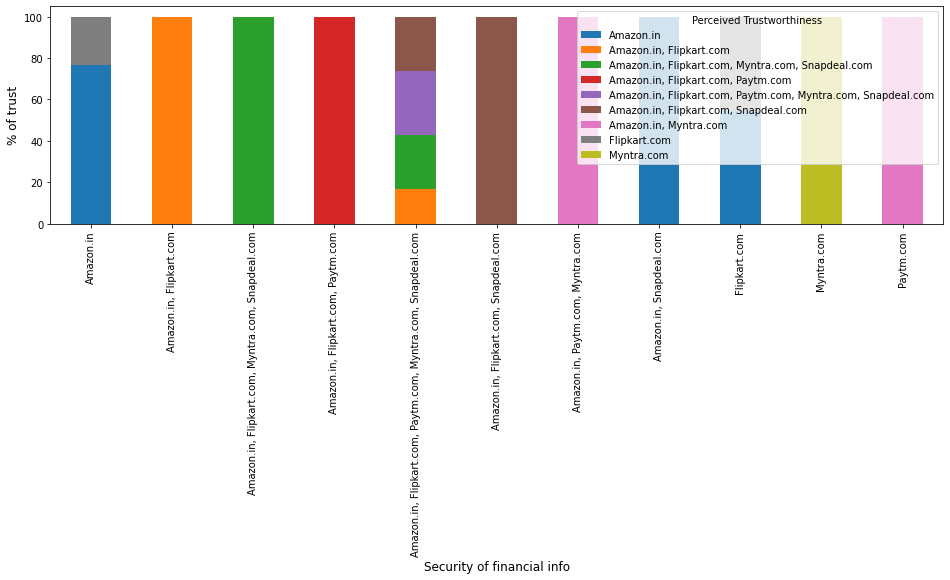

In [17]:
tbl=pd.crosstab(df['Security of customer financial information'],df['Perceived Trustworthiness'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('Security of financial info',fontsize=12)
plt.ylabel('% of trust',fontsize=12)

In [18]:
tbl=pd.crosstab(df['1Gender of respondent'],df['Which of the Indian online retailer would you recommend to a friend?'])
(tbl.div(tbl.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(16,4))
plt.xlabel('Gender of the customer',fontsize=12)
plt.ylabel('Indian online retailer would you recommend to a friend',fontsize=12

SyntaxError: unexpected EOF while parsing (<ipython-input-18-76807f726041>, line 4)